# Using python plots for chemical problems

Following from the introduction to the basics of matplotlib we will look at how it can be use to understand some of the classic chemical problems often encountered throughout a chemistry degree. The examples will be:

1. Using speciation plots to investigate how conjugate acid-base pairs change with pH
2. Using Hammett plots to determine the effect of electron donating/withdrawing groups on a reaction rate

## Speciation plots and pH 

Recall the Henderson-Hasselbach Equation often used to determine pH in buffer systems:

### $ \textrm{pH = p}K_{a} + \log(\frac{[\textrm{A}^{-}]}{[\textrm{HA}]}) $

We can rearrange this to determine fraction of conjudate acid to base $ (\frac{[\textrm{A}^{-}]}{[\textrm{HA}]}) $ changes as the pH moves either side of the instrisic $\textrm{p}K_{a}$ of the acid:

### $  \log(\frac{[\textrm{A}^{-}]}{[\textrm{HA}]}) = \textrm{pH - p}K_{a} $

The relations are coded up below focussing on the relevant range where the concetration of the species changes. 

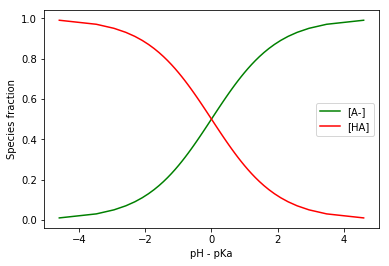

In [79]:
import numpy as np
import matplotlib.pyplot as plt

a = np.arange(0.01,1.01,0.02)    #start with an A- fraction of 0, bring it up to 100%
ha = 1 - a                   # HA + A- must add to 1. Since `a` is a numpy array math operation applies to all elements.
ph_minus_pka = np.log(a/ha)  #From the equation above

# add print statement so they can see what's going on    
    
plt.plot(ph_minus_pka, a, label='[A-]', color='g')
plt.plot(ph_minus_pka, ha, label='[HA]', color='r')
plt.legend()
plt.xlabel('pH - pKa')
plt.ylabel('Species fraction')

plt.show()

It is often useful to see what values are in any variable which is created. `print()` functions are used below the see  what element values of the numpy arrays. A larger stepsize is used to make the size of elements managble to print.

Mathematical operations applied to numpy arrays will apply to every element of that array. For other data not in an array, we would need to use a `for loop` (introduced later) to go through each value one at a time. 

In [ ]:
a = np.arange(0.1,1.0,0.1)    
ha = 1 - a                   # HA + A- must add to 1
ph_minus_pka = np.log(a/ha)  # Henderson-Hasselbach eqn

print("base conc.:", a)
print("acid conc.:", ha)
np.set_printoptions(precision=2) #stop numpy array printing too many decimal places
print("pH-pKa:", ph_minus_pka)

### Function for pH depedence of monoprotic acids

We can now our own function which takes the $ \textrm{p}K_{a} $ of the acid as input and returns a graph of the the pH depedence of the concentration of the conjugate acid and base species. `def function_name()` is the command which defines a new function. All the behaviour coded inside this function is now available to any further code cells by calling `function_name()` and passing the relevant data.  

In [81]:
def plot_speciation(acid_formula,pka): #defining new function, takes the formula name (as string), then pKa (as decimal)
    
    base_formula = acid_formula[:-1] + '-'  # Content covered later. Get base formula by replacing end character with '-'. 
    a = np.arange(0.01,1.01,0.02) 
    
    ha = 1 - a                   # HA + A- must add to 1
    ph_minus_pka = np.log(a/ha)
    ph = ph_minus_pka + pka

    plt.plot(ph, a, label=base_formula)
    plt.plot(ph, ha, label=acid_formula)
    plt.legend()
    plt.title(acid_formula + ' speciation pH depedence')
    plt.xlabel('pH')
    plt.ylabel('Species fraction')
    plt.show()

`plot_speciation()` is now a function we can use wherever we like in other code cells.

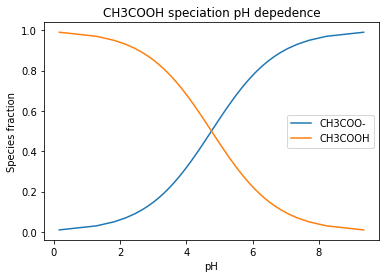

In [83]:
plot_speciation('CH3COOH',4.76)

Try using the `plot_speciation('acid formula',pKa)` function to investigate the behaviour of the weak acids listed below. Remember the first argument to the function is the formula surrounded by qoutation marks and the second is the pKa as a decimal value.


| Molecule | Formula | pKa |
| -------- | ------- | --- |
| chloroacetic acid | CH2ClCOOH | 2.85 | 
| formic acid | HCOOH | 3.75 | 
| benzoic acid | C6H5COOH | 4.19 | 
| acetic acid | CH3COOH | 4.75 | 
| propionic acid | CH3CH2COOH | 4.87 | 

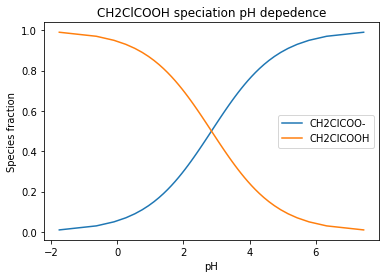

In [84]:
plot_speciation('CH2ClCOOH',2.85)

Plot your chosen acid by passing the correct values into the function below 

In [ ]:
plot_speciation('acid formula',pka)

### Polyprotic acids  

For polyprotic acids the expressions can be significantly more complicated, and often must be solved numerically. Luckily python has many scientific packages already written for it, including the `pHcalc` package which we will use to generate data for polyprotic acids to plot.

Since the `pHcalc` package might not be installed by default, we use the python package manager (`pip`) to install it before importing it.

_(! With the `pip` command: Since we want the computer do some processing outside of the notebook cell the `!` symbol is put in front of the command)_

In [1]:
! pip install pHcalc

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from pHcalc.pHcalc import Acid

The `Acid()` function of `pHcal` now allows passing multiple pKas for a polyprotic acid (in this example phosphoric acid, H3PO4), and will return an 'object' which we can access the data of with `.` functions. If we provide a series of pH values to the `.alpha` with function numpy array we can get get pack the fractional the concentration of species versus pH, which we can plot as y and x values. 

See https://pypi.org/project/pHcalc/ if you want more details.

***You might not fully follow everything going on under the hood in the code of an installed package***, but they can be useful to solve standard problems by following the manual guides.

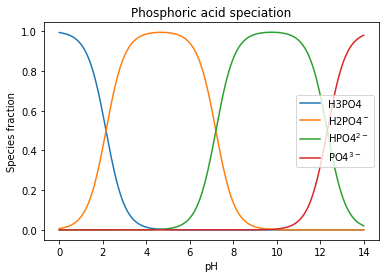

In [85]:
import numpy as np
from matplotlib import pyplot as plt

phosphoric_acid = Acid(pKa=[2.148, 7.198, 12.319], charge=0, conc=0.10)
phs  = np.arange(0, 14, 0.01)
fracs = phosphoric_acid.alpha(phs)

plt.plot(phs, fracs)

plt.legend(['H3PO4','H2PO4$^{-}$','HPO4$^{2-}$','PO4$^{3-}$'])
plt.title('Phosphoric acid speciation')
plt.xlabel('pH')
plt.ylabel('Species fraction')

plt.show()

Try making a plot with another polyprotic acid of your choice (look up pKa values online). The code skeleton is provided below. The code block can stay the same, just swap the pKa values and species name for your choice.

In [87]:
import numpy as np
from matplotlib import pyplot as plt

polyprotic_acid = Acid(pKa=[pka1, pka2, pka3], charge=0, conc=0.01)
phs  = np.arange(0, 14, 0.01)
fracs = polyprotic_acid.alpha(phs)

plt.plot(phs, fracs)

plt.legend(['species1','species2','species3','species4'])
plt.title('Title')
plt.xlabel('pH')
plt.ylabel('Species fraction')

plt.show()

NameError: name 'pka1' is not defined

## Hammett plots and electron withdrawing/donating groups (advanced)

One technique chemists use to understand reactivity is linear free energy relationships (LFERs) where changes in something like subtituents are linearly correlated with kinetics (equilibrium or rate constants). One of the most often taught and well known of these is the Hammett plot which used the ionisation of benzoic acid in water at 25$^{\circ}$C as the reference reaction.

<img src="figs/hammett_benzoic_acid_LFER.png" width="500">
_(image source: https://web.viu.ca/krogh/chem331/LFER%20Hammett%202012.pdf)_


Each substituent's effect on the $\textrm{p}K_{a}$  of benzoic acid was found to relate strongly to the rates of other reactions, and these substiuents effects were transferrable to other chemical systems. However, the strength of the relation would change so a new Hammett plot would need to be made to find parameters for other reactions. 

The Hammett equation can be written as: 

### $\log(\frac{k}{k_{H}}) = \rho \times \sigma$

$\rho$ is a used as multiplier to transform between the reference benzoic acid $\textrm{p}K_{a}$ values and the new reaction rate/equilibrium constant under question. $\sigma$ is the substituent constant, showing the change in $\textrm{p}K_{a}$ when moving from a H substituent to some substituent 'X'. $\sigma = pK_{a(H)} - pK_{A(X)}$

Hammett verified this equation with 38 dfferent reactions of bezene derivates to find $\rho$ values, which showed how strongly the compound's reaction rates were influenced by each substiuent. The magnitude of $\rho$ shows the extent of the effect, and a negative slope indicates the reaction involves build up of postive charge at the reaction site, whereas a positive slope indicates a build up of negative charge.  

The $\sigma$ value relates to whether the subsituent is electron donating or withdrawing compared to H. A negative $\sigma$ value is found with electron donating substituent (e.g. OCH$_{3}$ = -0.27), whereas a positive $\sigma$ value is electron withdrawing ones (e.g NO$_{2}$ = 0.71), and are empirical values independent of the reaction being studied.

There is far more detail available in physical organic chemistry textbooks about refinements to the Hammett plot, such as $\sigma$ values for _para_ or _meta_ substitution ($\sigma_{m}$ & $\sigma_{p}$), cases where charge build up in the trasition state effects the rate of reaction ($\sigma^{+}$ & $\sigma^{-}$), and cases of non-linearity in the Hammet plot gives intersting mechanistic insights like a change in reaction mechanism. 


In this Hammett plot excercise for python teaching purposes we will stick with only with a linear plot, though more complicated cases could be handled.

Below is a table of a few standard $\sigma$ values from Hammett's 1937 paper (_JACS_, **1937**, *59*, 96-103), though more modern datasets (_Chem. Rev._, **1991**, *97*, 165-195, etc.) exist:


| Substituent | $\sigma$ |  
| -------- | ------- | 
| p-OCH$_{3}$ | -0.268 | 
| p-CH$_{3}$ | -0.170 | 
| m-NH$_{2}$ | -0.161 | 
| m-CH$_{3}$ | -0.069 | 
| -H | 0.00 | 
| m-OCH$_{3}$ | +0.115 | 
| p-Br | +0.232 |
| m-F | +0.337 |
| m-Br | +0.391 |
| p-CH$_{3}$ | +0.54 |
| m-CN | +0.687 |
| m-NO$_{2}$ | +0.71 |

I've coded up these values in a python 'dictionary' which is an easy way to match a name to a value. This way instead of inputting raw $\sigma$ values in your code, you can look up the substituent by name, keeping the $\sigma$ table in an easy to edit format.

In [88]:
sigma_dict = {
    "p-OCH3" : -0.268,
    "p-CH3" : -0.170,
    "m-NH2" : -0.161,
    "m-CH3" : -0.069,
    "H" : 0.00,
    "m-OCH3" : 0.115,
    "p-Br" : 0.232,
    "m-F" : 0.337,
    "m-Br" : 0.391,
    "p-CF3" : 0.54,
    "m-CN" : 0.687,
    "m-NO2" : 0.71,
}

In [89]:
sigma_dict["m-CH3"]

-0.069

Normally the data for chemical reactions ends up stored in a spreadsheet —and python can handle that!— however the process of reading in data for external files will be covered in next lesson. In this case the raw kinetic data from undergraduates for Hammett plots of aromatic ethyl esters has is re-entered in the code block below, but after lesson #3 you will have the skills to read this data in from Excel sheets yourself.

**Don't worry about understanding all that the code below is doing, it uses features explained next lesson.** The main idea is to see such Hammett plots can be made by python, and then python's compliment of statistical tools used to analyse it.

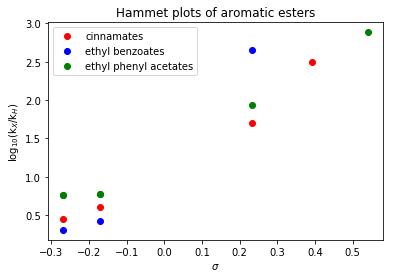

In [35]:
### Data of kinetics versus subsitutent. Repeat values are from different student experiments.
ethyl_benzoates_data = [('p-OCH3', 0.25124858, 0.31789953, 0.34875611, 0.30596808),
 ('p-CH3', 0.42011811, 0.4843879 , 0.36956354, 0.42468985),
 ('p-Br', 1.87988143, 3.62966683, 2.43192092, 2.6471564 )]

cinnamates_data = [('p-OCH3', 0.39502424, 0.4431951 , 0.49658323, 0.44493419),
 ('p-CH3', 0.71415387, 0.59452982, 0.51906489, 0.60924953),
 ('p-Br', 1.89235055, 1.85388599, 1.37427896, 1.7068385 ),
 ('m-Br', 2.88630749, 2.53973572, 2.05393715, 2.49332678)]

ethyl_phenyl_acetates_data =  [('p-OCH3', 0.65543456, 0.79708098, 0.8423505 , 0.76495534),
 ('p-CH3', 0.68436683, 0.84323783, 0.80811398, 0.77857288),
 ('p-Br', 2.0017735 , 1.6864278 , 2.10296531, 1.93038887),
 ('p-CF3', 2.82229042, 2.70171052, 3.12790582, 2.88396892),
 ('p-OCH3', 0.65543456, 0.79708098, 0.8423505 , 0.76495534),
 ('p-CH3', 0.68436683, 0.84323783, 0.80811398, 0.77857288)]


# Function to take raw student data and return the class average for each reaction
def average_vals(data):
    x_vals = []
    y_vals = [] 
    for row in data:
        x_vals.append(sigma_dict[row[0]])
        y_vals.append(np.average(row[1:]))
    
    return x_vals, y_vals

# Generating x & y values for separate linear plots of cinnamates, ethyl benzoates and ethyl phenyl acetates
cinnamates_x_vals, cinnamates_y_vals = average_vals(cinnamates_data)        
ethyl_benzoates_x_vals, ethyl_benzoates_y_vals = average_vals(ethyl_benzoates_data)        
ethyl_phenyl_acetates_x_vals, ethyl_phenyl_acetates_y_vals = average_vals(ethyl_phenyl_acetates_data)        

# 3 separate Hammett plots
plt.plot(cinnamates_x_vals, cinnamates_y_vals, 'ro', label='cinnamates')
plt.plot(ethyl_benzoates_x_vals, ethyl_benzoates_y_vals, 'bo', label='ethyl benzoates')
plt.plot(ethyl_phenyl_acetates_x_vals, ethyl_phenyl_acetates_y_vals, 'go', label='ethyl phenyl acetates')

plt.title('Hammett plots of aromatic esters')
plt.xlabel('$\sigma$')
plt.ylabel('log$_{10}$(k$_{X}$/k$_{H}$)')

plt.legend()
plt.show()

**This Hammet plot has the data, but no trendline or error bars.** We will use numpy's linear fitting routines to add trendlines, then replot the graph. Trendlines are accomplished using 1st order polynomials (linear) with numpys `.polyfit()` functions.

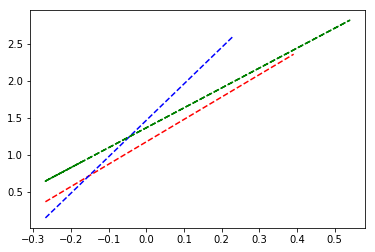

In [90]:
z_cinnamates = np.polyfit(cinnamates_x_vals, cinnamates_y_vals, 1) # fits a polynomial of degree 1 to the x,y values
p_cinnamates = np.poly1d(z_cinnamates)                           # represent that polyfit as a natural 1D polynomial
plt.plot(cinnamates_x_vals, p_cinnamates(cinnamates_x_vals), 'r--') # apply 1D polynomial to x-vals to get trendline

z_ethyl_benzoates = np.polyfit(ethyl_benzoates_x_vals, ethyl_benzoates_y_vals, 1)
p_ethyl_benzoates = np.poly1d(z_ethyl_benzoates)
plt.plot(ethyl_benzoates_x_vals, p_ethyl_benzoates(ethyl_benzoates_x_vals), 'b--')

z_ethyl_phenyl_acetates = np.polyfit(ethyl_phenyl_acetates_x_vals, ethyl_phenyl_acetates_y_vals, 1)
p_ethyl_phenyl_acetates = np.poly1d(z_ethyl_phenyl_acetates)
plt.plot(ethyl_phenyl_acetates_x_vals, p_ethyl_phenyl_acetates(ethyl_phenyl_acetates_x_vals), 'g--')

plt.show()

You can see that we have the trendlines for each curve, and we could fit higher polynomials by chaging the last argument of `.polyfit()` from 1 to whatever order is appropriate.

The use of poly1d gives a polynomial python can naturally handle, so we can retrive the equation of fit using a print statement.

In [91]:
print(p_ethyl_benzoates)

 
4.928 x + 1.464


If we wanted error bars we can use the `plt.errorbar(x,y,xerr,err)` function.

First we can use numpy to get the standard deviation of the students result for each molecule.

**Again some advanced functions are used, just try to follow the ouput**

In [92]:
print(cinnamates_data)

[('p-OCH3', 0.39502424, 0.4431951, 0.49658323, 0.44493419), ('p-CH3', 0.71415387, 0.59452982, 0.51906489, 0.60924953), ('p-Br', 1.89235055, 1.85388599, 1.37427896, 1.7068385), ('m-Br', 2.88630749, 2.53973572, 2.05393715, 2.49332678)]


In [93]:
for substituent_vals in cinnamates_data:
    err = np.std(substituent_vals[1:])
    substituent = substituent_vals[0]
    print('Substituent: {}, Error: {}'.format(substituent,err))

Substituent: p-OCH3, Error: 0.035922315056076896
Substituent: p-CH3, Error: 0.06956087209281032
Substituent: p-Br, Error: 0.20410385386826613
Substituent: m-Br, Error: 0.2956564201465802


## Automatic, detailed Hammett plot (extension example)

**By combining the code techniques used above it is possible to go from data -> annonated plot with one Jupyter code cell.**

The code block below is probably a bit daunting, it is just an example of the strength of python to automatically plot any data once you learn its basic functions. Just try running it to inspect the output.

Such code can then easily be reused for all sorts of Hammett data.

**You can save any figures you generate with `plt.savefig('name')`. **

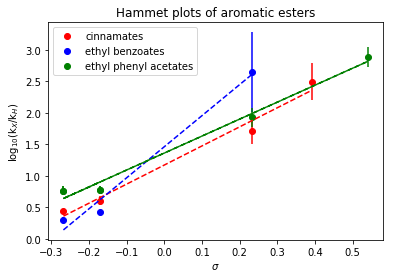

In [78]:
### Data of kinetics versus subsitutent. Repeat values are from different student experiments.
ethyl_benzoates_data = [('p-OCH3', 0.25124858, 0.31789953, 0.34875611, 0.30596808),
 ('p-CH3', 0.42011811, 0.4843879 , 0.36956354, 0.42468985),
 ('p-Br', 1.87988143, 3.62966683, 2.43192092, 2.6471564 )]

cinnamates_data = [('p-OCH3', 0.39502424, 0.4431951 , 0.49658323, 0.44493419),
 ('p-CH3', 0.71415387, 0.59452982, 0.51906489, 0.60924953),
 ('p-Br', 1.89235055, 1.85388599, 1.37427896, 1.7068385 ),
 ('m-Br', 2.88630749, 2.53973572, 2.05393715, 2.49332678)]

ethyl_phenyl_acetates_data =  [('p-OCH3', 0.65543456, 0.79708098, 0.8423505 , 0.76495534),
 ('p-CH3', 0.68436683, 0.84323783, 0.80811398, 0.77857288),
 ('p-Br', 2.0017735 , 1.6864278 , 2.10296531, 1.93038887),
 ('p-CF3', 2.82229042, 2.70171052, 3.12790582, 2.88396892),
 ('p-OCH3', 0.65543456, 0.79708098, 0.8423505 , 0.76495534),
 ('p-CH3', 0.68436683, 0.84323783, 0.80811398, 0.77857288)]

# Modified function takes all raw student data and returns all values needed for detailed Hammett plot
def process_hammett(data):
    x_vals = []
    y_vals = []
    y_errs = [] 
    for row in data:
        x_vals.append(sigma_dict[row[0]])
        y_vals.append(np.average(row[1:]))
        y_errs.append(np.std(row[1:]))
    
    return x_vals, y_vals, y_errs

# Generating x & y values for separate linear plots of cinnamates, ethyl benzoates and ethyl phenyl acetates
cinnamates_x_vals, cinnamates_y_vals, cinnamates_errs = process_hammett(cinnamates_data)        
ethyl_benzoates_x_vals, ethyl_benzoates_y_vals, ethyl_benzoates_errs = process_hammett(ethyl_benzoates_data)        
ethyl_phenyl_acetates_x_vals, ethyl_phenyl_acetates_y_vals, ethyl_phenyl_acetates_errs = process_hammett(ethyl_phenyl_acetates_data)        

# 3 separate Hammett plots
plt.plot(cinnamates_x_vals, cinnamates_y_vals, 'ro', label='cinnamates')
plt.errorbar(cinnamates_x_vals, cinnamates_y_vals, xerr=0, yerr=cinnamates_errs, ls='none', ecolor='r')
                      
plt.plot(ethyl_benzoates_x_vals, ethyl_benzoates_y_vals, 'bo', label='ethyl benzoates')
plt.errorbar(ethyl_benzoates_x_vals, ethyl_benzoates_y_vals, xerr=0, yerr=ethyl_benzoates_errs, ls='none', ecolor='b')

plt.plot(ethyl_phenyl_acetates_x_vals, ethyl_phenyl_acetates_y_vals, 'go', label='ethyl phenyl acetates')
plt.errorbar(ethyl_phenyl_acetates_x_vals, ethyl_phenyl_acetates_y_vals, xerr=0, yerr=ethyl_phenyl_acetates_errs, ls='none', ecolor='g')

z_cinnamates = np.polyfit(cinnamates_x_vals, cinnamates_y_vals, 1) # fits a polynomial of degree 1 to the x,y values
p_cinnamates = np.poly1d(z_cinnamates)                           # represent that polyfit as a natural 1D polynomial
plt.plot(cinnamates_x_vals, p_cinnamates(cinnamates_x_vals), 'r--') # apply 1D polynomial to x-vals to get trendline

z_ethyl_benzoates = np.polyfit(ethyl_benzoates_x_vals, ethyl_benzoates_y_vals, 1)
p_ethyl_benzoates = np.poly1d(z_ethyl_benzoates)
plt.plot(ethyl_benzoates_x_vals, p_ethyl_benzoates(ethyl_benzoates_x_vals), 'b--')

z_ethyl_phenyl_acetates = np.polyfit(ethyl_phenyl_acetates_x_vals, ethyl_phenyl_acetates_y_vals, 1)
p_ethyl_phenyl_acetates = np.poly1d(z_ethyl_phenyl_acetates)
plt.plot(ethyl_phenyl_acetates_x_vals, p_ethyl_phenyl_acetates(ethyl_phenyl_acetates_x_vals), 'g--')

plt.title('Hammett plots of aromatic esters')
plt.xlabel('$\sigma$')
plt.ylabel('log$_{10}$(k$_{X}$/k$_{H}$)')

plt.legend()
plt.savefig('Hammett_aromatic_esters.png', dpi=400)

You should now have a satisfying Hammett plot image file. In the next workshop lesson #3 will teach more basic pyton functionality, so you can understand what it going on above, and apply it to computational chemistry problems.